## Hotel Booking Project

### Lunjing Yuan

December 2020

This is a final project for *MSIS 2507 Data Analytics with Python* class at Santa Clara University 

- Description of data set
- Summary of the three finding
- Three managerial insights

This dataset is from Kaggle: https://www.kaggle.com/datasets/mojtaba142/hotel-booking


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%pylab inline

import sklearn as sk
import sklearn.tree as tree
from sklearn import linear_model
from IPython.display import Image  
import pydotplus

Populating the interactive namespace from numpy and matplotlib


In [2]:
pd.set_option('display.max_columns',100)

In [3]:
df = pd.read_csv("hotel_bookings.csv", encoding='ISO-8859-1', index_col=0) 

In [4]:
df.head(50)

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
hotel,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
Resort Hotel,0,0,2015,July,27,1,0,2,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,NaN,NaN,0,Transient,107.00,0,0,Check-Out,2015-07-03
Resort Hotel,0,9,2015,July,27,1,0,2,2,0.0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,303.0,NaN,0,Transient,103.00,0,1,Check-Out,2015-07-03
Resort Hotel,1,85,2015,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,82.00,0,1,Canceled,2015-05-06


## <div class="alert alert-block alert-warning">Data Description : </div>

In [5]:
df.columns

Index(['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

This is a hotel booking data set for a resort hotel and a city hotel in Portugal:
<ul>
<li><b>is_canceled</b>: Value indicating if the booking was canceled.
<li><b>country</b>: Country of origin.
<li><b>market_segment</b>: Market segment designation.In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”.
<li><b>lead_time</b>: Number of days that elapsed between the entering date of the booking into the PMS and the arrival date. 
<li><b>total_of_special_requests</b>: Number of special requests made by the customer.
<li><b>booking_changes</b>: Number of changes/amendments made to the booking from the moment the booking was entered on the PMS. 
<li><b>previous_cancellations</b>: Number of previous bookings that were cancelled by the customer prior to the current booking.
<li><b>is_repeated_guest</b>: Value indicating if the booking name was from a repeated guest (1) or not (0).
<li><b>previous_bookings_not_canceled</b>: Number of previous bookings not cancelled by the customer prior to the current booking.
<li><b>reservation_status</b>: The day when the appointment was scheduled    
    <ul>
    <li><i>Canceled</i>: booking was canceled by the customer.
    <li><i>Check-Out</i>: customer has checked in but already departed;. 
    <li><i>No-Show</i>: customer did not check-in and did inform the hotel of the reason why.
    </ul>
<li><b>days_in_waiting_list</b>: Number of days the booking was in the waiting list before it was confirmed to the customer.
<li><b>arrival_date_month</b>: Month of arrival date with 12 categories: “January” to “December”.
</ul>



`

## <div class="alert alert-block alert-warning">Data preparation : </div>

#### How many NaN in the dataset 

In [6]:
df.isna().sum().sum()

129425

#### Drop NaN

In [7]:
df.isna().sum()

is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_

#### Columns such as "company" and "agent" lack significant utility in our analysis and are primarily populated with NULL values. Consequently, we have chosen to remove these columns from our dataset.

In [8]:
df.drop(['company', 'agent'],
  axis='columns', inplace=True)

#### We fill NaN in children column with 0 

In [9]:
df.children.fillna(0, inplace=True)

#### We fill NaN in country column with 'Unknown'

In [10]:
df.country.fillna('Unknown', inplace=True)

#### Check NaN again

In [11]:
df.isna().any()

is_canceled                       False
lead_time                         False
arrival_date_year                 False
arrival_date_month                False
arrival_date_week_number          False
arrival_date_day_of_month         False
stays_in_weekend_nights           False
stays_in_week_nights              False
adults                            False
children                          False
babies                            False
meal                              False
country                           False
market_segment                    False
distribution_channel              False
is_repeated_guest                 False
previous_cancellations            False
previous_bookings_not_canceled    False
reserved_room_type                False
assigned_room_type                False
booking_changes                   False
deposit_type                      False
days_in_waiting_list              False
customer_type                     False
adr                               False


## <div class="alert alert-block alert-info">Finding 1 : Reservations made by groups exhibit the highest rate of cancellations.</div>

#### Frequency count for each market segment

In [12]:
total_segment = df.groupby(['hotel','market_segment'])['market_segment'].count()
total_segment

hotel         market_segment
City Hotel    Aviation            237
              Complementary       542
              Corporate          2986
              Direct             6093
              Groups            13975
              Offline TA/TO     16747
              Online TA         38748
              Undefined             2
Resort Hotel  Complementary       201
              Corporate          2309
              Direct             6513
              Groups             5836
              Offline TA/TO      7472
              Online TA         17729
Name: market_segment, dtype: int64

#### Frequency count for each market's cancellation status

In [13]:
total_canceled = df.groupby(['hotel','market_segment'])['is_canceled'].sum()
total_canceled 

hotel         market_segment
City Hotel    Aviation             52
              Complementary        64
              Corporate           641
              Direct             1056
              Groups             9623
              Offline TA/TO      7173
              Online TA         14491
              Undefined             2
Resort Hotel  Complementary        33
              Corporate           351
              Direct              878
              Groups             2474
              Offline TA/TO      1138
              Online TA          6248
Name: is_canceled, dtype: int64

#### Calculation of the cancellation rate for each market

In [14]:
cancel_rate = total_canceled/total_segment
cancel_rate 

hotel         market_segment
City Hotel    Aviation          0.219409
              Complementary     0.118081
              Corporate         0.214668
              Direct            0.173314
              Groups            0.688587
              Offline TA/TO     0.428316
              Online TA         0.373981
              Undefined         1.000000
Resort Hotel  Complementary     0.164179
              Corporate         0.152014
              Direct            0.134807
              Groups            0.423920
              Offline TA/TO     0.152302
              Online TA         0.352417
dtype: float64

#### Generate a dataframe for the subsequent plot

In [15]:
df_cancel_rate = cancel_rate.to_frame(name='cancel_rate').reset_index()
df_cancel_rate

,hotel,market_segment,cancel_rate
0,City Hotel,Aviation,0.219409
1,City Hotel,Complementary,0.118081
2,City Hotel,Corporate,0.214668
3,City Hotel,Direct,0.173314
4,City Hotel,Groups,0.688587
5,City Hotel,Offline TA/TO,0.428316
6,City Hotel,Online TA,0.373981
7,City Hotel,Undefined,1.000000
8,Resort Hotel,Complementary,0.164179
9,Resort Hotel,Corporate,0.152014


In [16]:
# For data with "Undefined", there is only 2 data in it but with 100% cancel rate. 
# Considering they might influence analysis and plot, we droped it.
df_cancel_rate.drop([7],inplace = True)

####  Bar graph: Cancellation Rate by Market Segment

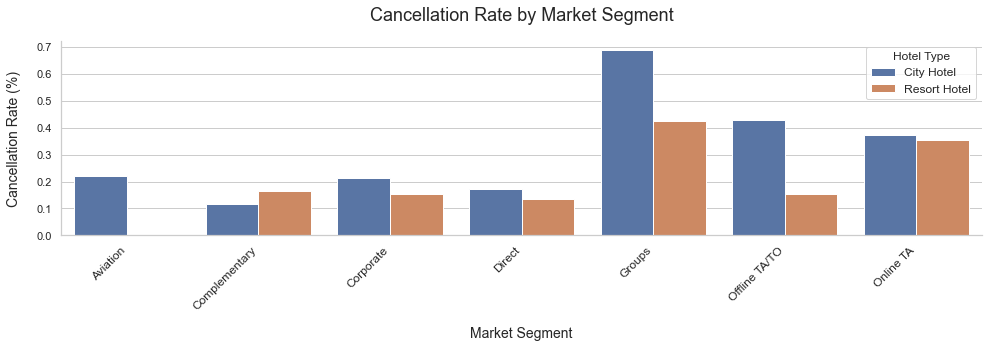

In [17]:
# Set the style
sns.set(style="whitegrid")

# Create the plot using catplot
plot = sns.catplot(x='market_segment', y='cancel_rate', hue='hotel', data=df_cancel_rate, kind='bar', aspect=2.5)

# Set title and labels
plt.title('Cancellation Rate by Market Segment', fontsize=18, pad=20)
plt.xlabel("Market Segment", fontsize=14, labelpad=15)
plt.ylabel("Cancellation Rate (%)", fontsize=14, labelpad=15)

# Adjust legend position
plt.legend(title='Hotel Type', fontsize=12, title_fontsize=12)
plot._legend.set_bbox_to_anchor((1, 0.5))

# Remove extra legend
plot._legend.remove()

# Adjust x-axis labels rotation for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


### Conclusion: The group reservations exhibit the highest cancellation rate.

### <font color=blue>Managerial insights 1：</font> 

Given the notably elevated cancellation rate among group reservations, we recommend that hotels consider implementing a penalty system, such as rendering hotel prepayments non-refundable.


## <div class="alert alert-block alert-info">Finding 2 : The summer season witnessed a substantial decline in the volume of orders </div>

#### Determine the exact number of orders that were successfully checked out at both Resort and City hotels, ensuring that these orders correspond to guests who indeed completed their stays.

In [18]:
df2 = df.reset_index()

In [19]:
df2['resort_hotel'] = (df2.hotel == "Resort Hotel") & (df2.reservation_status == 'Check-Out')
df2['city_hotel'] = (df2.hotel == "City Hotel") & (df2.reservation_status == 'Check-Out')

In [20]:
df2

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,resort_hotel,city_hotel
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01,True,False
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01,True,False
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02,True,False
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02,True,False
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-07-03,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out,2017-09-06,False,True
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out,2017-09-07,False,True
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out,2017-09-07,False,True
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out,2017-09-07,False,True


#### For each month, calculate the total number of orders recorded for both the Resort and City hotels.

In [21]:
monthly_resort = df2.groupby("arrival_date_month")["resort_hotel"].sum()
monthly_city = df2.groupby("arrival_date_month")["city_hotel"].sum()

In [22]:
monthly_city

arrival_date_month
April        4015
August       5381
December     2392
February     3064
January      2254
July         4782
June         4366
March        4072
May          4579
November     2696
October      4337
September    4290
Name: city_hotel, dtype: int64

In [23]:
monthly_resort

arrival_date_month
April        2550
August       3257
December     2017
February     2308
January      1868
July         3137
June         2038
March        2573
May          2535
November     1976
October      2577
September    2102
Name: resort_hotel, dtype: int64

#### Before computing the average number of orders for each month, we merge the total order counts from the Resort and City dataframes.

In [24]:
df2_resort =  pd.DataFrame({"month": list(monthly_resort.index),"hotel": "Resort hotel",\
                          "orders": list(monthly_resort.values)})
df2_city =  pd.DataFrame({"month": list(monthly_city.index),"hotel": "City hotel",\
                          "orders": list(monthly_city.values)})
total_order = df2_city.append(df2_resort, ignore_index=True)
total_order 

,month,hotel,orders
0,April,City hotel,4015
1,August,City hotel,5381
2,December,City hotel,2392
3,February,City hotel,3064
4,January,City hotel,2254
5,July,City hotel,4782
6,June,City hotel,4366
7,March,City hotel,4072
8,May,City hotel,4579
9,November,City hotel,2696


The dataset spans the date range from July 1, 2015 to August 31, 2017. To account for the different number of days in each month, the totals for August and July should be divided by 3 since the data covers 3 instances of those months. The remaining months should be divided by 2 since they are represented twice within the date range. Standardizing the monthly values in this way will help compensate for the uneven distribution of days across the months in the dataset's timeframe. This adjustment will enable more accurate cross-month comparisons and analysis.

#### In summary:
- August and July totals should be divided by 3
- All other months should be divided by 2
- This accounts for the 3 years of data covering different month lengths
- Standardizing the totals will improve cross-month analysis

In [25]:
total_order.loc[(total_order ["month"] == "July") | (total_order ["month"] == "August"),"orders"] /= 3
total_order.loc[~((total_order ["month"] == "July") | (total_order ["month"] == "August")),"orders"] /= 2
total_order

,month,hotel,orders
0,April,City hotel,2007.500000
1,August,City hotel,1793.666667
2,December,City hotel,1196.000000
3,February,City hotel,1532.000000
4,January,City hotel,1127.000000
5,July,City hotel,1594.000000
6,June,City hotel,2183.000000
7,March,City hotel,2036.000000
8,May,City hotel,2289.500000
9,November,City hotel,1348.000000


#### Ploting the graph for Average Number of Orders Each Month

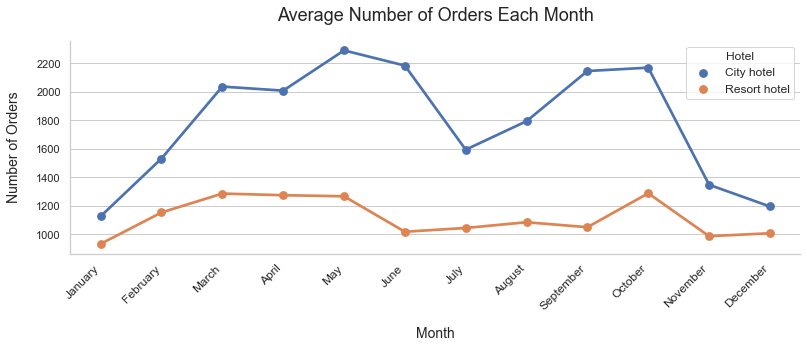

In [26]:

month_order = ["January", "February", "March", "April", "May", "June", "July", "August",
               "September", "October", "November", "December"]

# Set the style
sns.set(style="whitegrid")

# Create the plot using catplot
plot = sns.catplot(x='month', y='orders', hue='hotel', kind='point', data=total_order, order=month_order, aspect=2)

# Set title and labels
plt.title("Average Number of Orders Each Month", fontsize=18, pad=20)
plt.xlabel("Month", fontsize=14, labelpad=15)
plt.ylabel("Number of Orders", fontsize=14, labelpad=15)

# Adjust x-axis labels rotation for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Move the legend to the upper right corner
plt.legend(title='Hotel', fontsize=12, title_fontsize=12, loc='upper right')
# Remove extra legend
plot._legend.remove()

# Show the plot
plt.tight_layout()
plt.show()


### Conclusion: During the summer season, there was a notable decrease in the volume of orders.

#### To offer recommendations, my focus is on identifying the top three countries with the highest booking records.

In [27]:
c = df.groupby('country')['country'].count().nlargest(3)
c

country
PRT    48590
GBR    12129
FRA    10415
Name: country, dtype: int64

### <font color=blue>Managerial insights 2：</font> 
1. Targeting local leisure travelers can expand the share of bookings within Portugal. Hosting summer events can draw Portuguese guests seeking fun experiences aligned with local culture and seasonal travel motives. To attract domestic Portuguese guests, hotels can host engaging local events like summer barbeque contests and pool parties. 

2. Offer discounts or incentives such as free breakfast for orders made in Germany and France during the summer season.

## <div class="alert alert-block alert-info">Finding 3: Reservation cancellations tend to rise as the lead time becomes longer. </div>

Here, I  use Machine Learning - Regression Model to lead to the third finding.

#### Retrieve the variables for analysis

In [28]:
canceled_cor = df.corr()['is_canceled']
canceled_cor

is_canceled                       1.000000
lead_time                         0.293123
arrival_date_year                 0.016660
arrival_date_week_number          0.008148
arrival_date_day_of_month        -0.006130
stays_in_weekend_nights          -0.001791
stays_in_week_nights              0.024765
adults                            0.060017
children                          0.005036
babies                           -0.032491
is_repeated_guest                -0.084793
previous_cancellations            0.110133
previous_bookings_not_canceled   -0.057358
booking_changes                  -0.144381
days_in_waiting_list              0.054186
adr                               0.047557
required_car_parking_spaces      -0.195498
total_of_special_requests        -0.234658
Name: is_canceled, dtype: float64

In [29]:
index = abs(canceled_cor).sort_values(ascending = False).nlargest(10).index
index

Index(['is_canceled', 'lead_time', 'total_of_special_requests',
       'required_car_parking_spaces', 'booking_changes',
       'previous_cancellations', 'is_repeated_guest', 'adults',
       'previous_bookings_not_canceled', 'days_in_waiting_list'],
      dtype='object')

In [30]:
df_canceled = df[index]

In [31]:
df_canceled

,is_canceled,lead_time,total_of_special_requests,required_car_parking_spaces,booking_changes,previous_cancellations,is_repeated_guest,adults,previous_bookings_not_canceled,days_in_waiting_list
hotel,,,,,,,,,,
Resort Hotel,0,342,0,0,3,0,0,2,0,0
Resort Hotel,0,737,0,0,4,0,0,2,0,0
Resort Hotel,0,7,0,0,0,0,0,1,0,0
Resort Hotel,0,13,0,0,0,0,0,1,0,0
Resort Hotel,0,14,1,0,0,0,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...
City Hotel,0,23,0,0,0,0,0,2,0,0
City Hotel,0,102,2,0,0,0,0,3,0,0
City Hotel,0,34,4,0,0,0,0,2,0,0


#### Make <i>X</i> and <i>Y</i>

In [32]:
X = df_canceled.drop('is_canceled',axis=1)

In [33]:
Y = df.is_canceled

In [34]:
regLasso = linear_model.Lasso()

In [35]:
regLasso.fit(X,Y)

Lasso()

#### Explore relevant factors

In [36]:
regLasso.coef_

array([ 0.00123707, -0.        , -0.        , -0.        ,  0.        ,
       -0.        ,  0.        , -0.        ,  0.        ])

In [37]:
d = {X.columns[i] : regLasso.coef_[i] for i in range(0,len(X.columns))}

In [38]:
s = pd.Series(d)

In [39]:
s[s != 0]

lead_time    0.001237
dtype: float64

#### Concentrate on the variable 'Lead_time'. Examine the correlation between lead time and cancellations.

In [40]:
avg_cancel = df.groupby('lead_time')['is_canceled'].mean()

In [41]:
avg_cancel

lead_time
0      0.067770
1      0.092775
2      0.102948
3      0.100220
4      0.102624
         ...   
622    1.000000
626    1.000000
629    1.000000
709    0.000000
737    0.000000
Name: is_canceled, Length: 479, dtype: float64

#### Scatter Plot and Regression Line of Lead Time and Cancellation

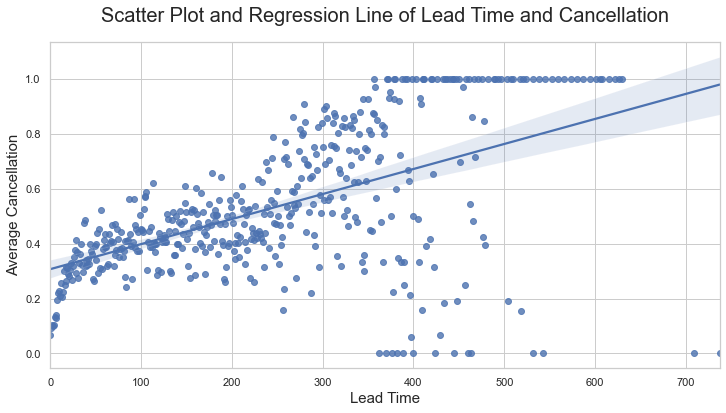

In [42]:


# Create the plot using regplot
plot = sns.regplot(x=avg_cancel.index, y=avg_cancel.values)

# Set title and labels
plot.set_title("Scatter Plot and Regression Line of Lead Time and Cancellation", fontsize=20, pad=20)
plot.set_xlabel("Lead Time", fontsize=15)
plot.set_ylabel("Average Cancellation", fontsize=15)

# Set figure size
plot.figure.set_size_inches(12, 6)

# Show the plot
plt.show()


### Conclusion: Reservation cancellations tend to rise as the lead time becomes longer.

Here, I want to find out the Cancellation Rate by Binned Lead Time

In [43]:
df.lead_time.nlargest()

hotel
Resort Hotel    737
Resort Hotel    709
City Hotel      629
City Hotel      629
City Hotel      629
Name: lead_time, dtype: int64

In [44]:
df['binned_leadTime'] = pd.cut(df['lead_time'],\
                        bins=[0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700])

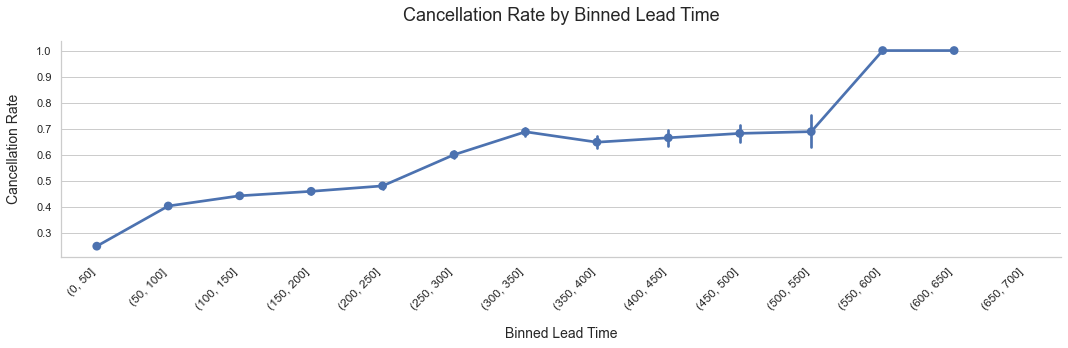

In [45]:


# Set the style
sns.set(style="whitegrid")

# Create the plot using catplot
plot = sns.catplot(x='binned_leadTime', y='is_canceled', data=df, kind='point', aspect=3)

# Set title and labels
plt.title("Cancellation Rate by Binned Lead Time", fontsize=18, pad=20)
plt.xlabel("Binned Lead Time", fontsize=14, labelpad=15)
plt.ylabel("Cancellation Rate", fontsize=14, labelpad=15)

# Adjust x-axis labels rotation for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


### <font color=blue>Managerial insights 3：</font> 

To incentivize guests to uphold long lead time reservations, hotels could offer progressive discounts for early booking:

- 10% discount for reservations made 50 days in advance
- 15% discount for reservations made 100 days in advance
- 20% discount for reservations made 150 days in advance

Implementing tiered discounts based on farther booking horizons may encourage guests to lock in their plans further ahead of time. The increased savings for booking earlier also rewards guests more for committing to travel plans well in advance. This tiered discount system enables hotels to secure bookings across a longer horizon, reducing the likelihood of late cancellations that leave rooms unfilled. The steeper discounts for earlier commitments give guests greater incentive to uphold rather than cancel their early reservations.

In summary, offering discounts scaled to booking lead time is a strategy hotels could employ to retain more long lead time reservations and mitigate risk of late cancellations. The tiered incentive structure rewards early commitment while benefiting hotels through higher advance booking volumes.